In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

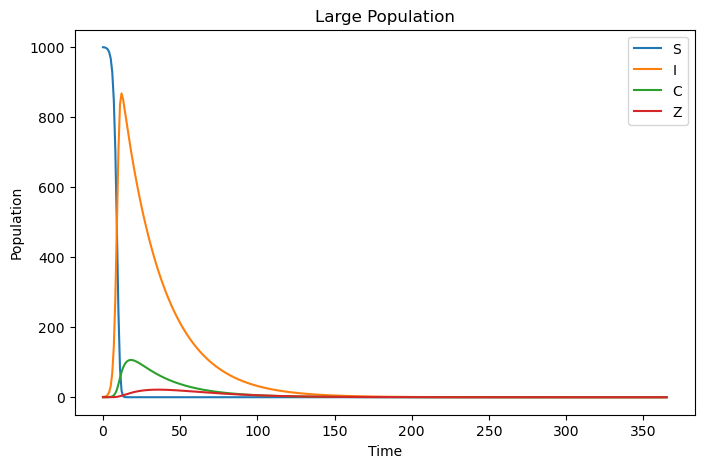

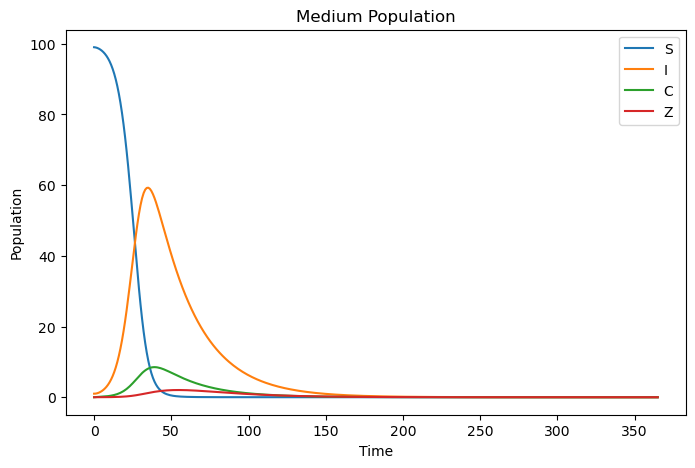

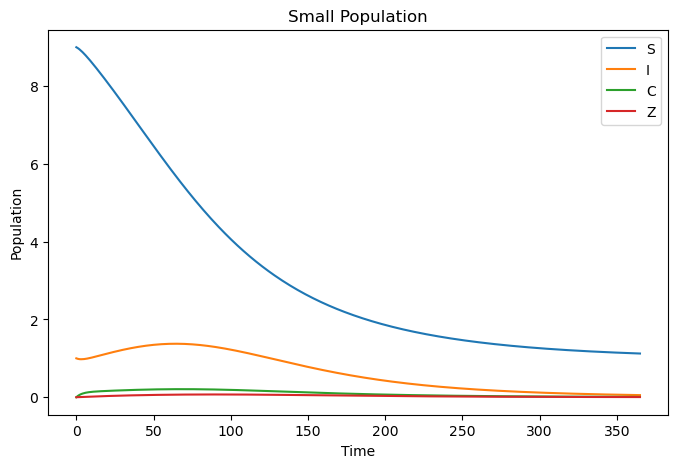

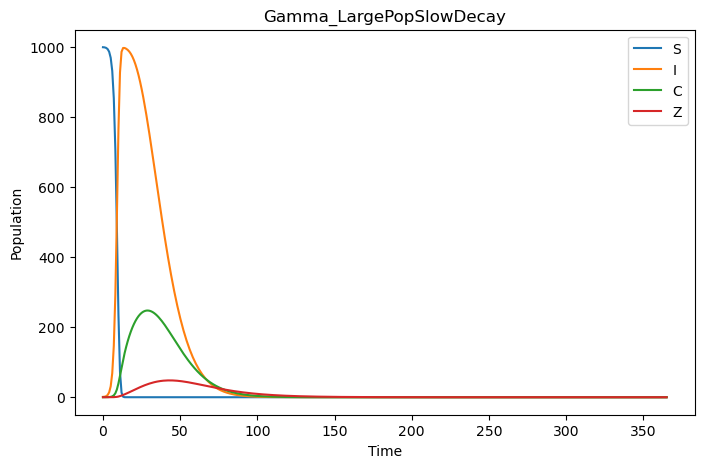

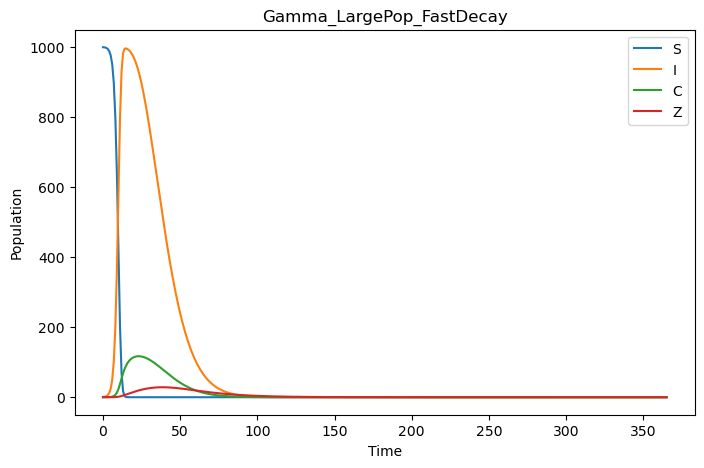

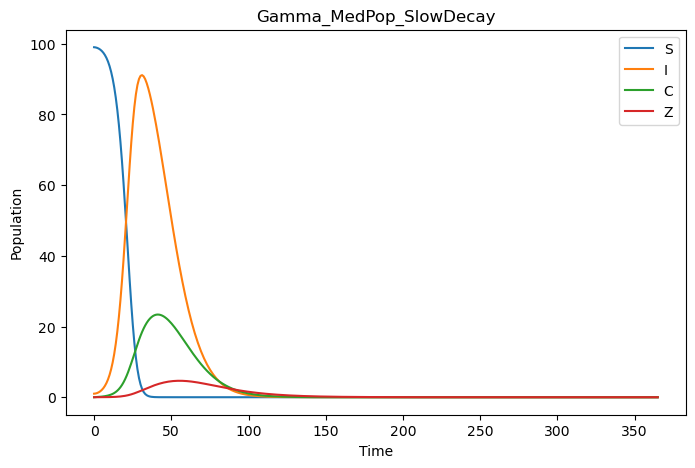

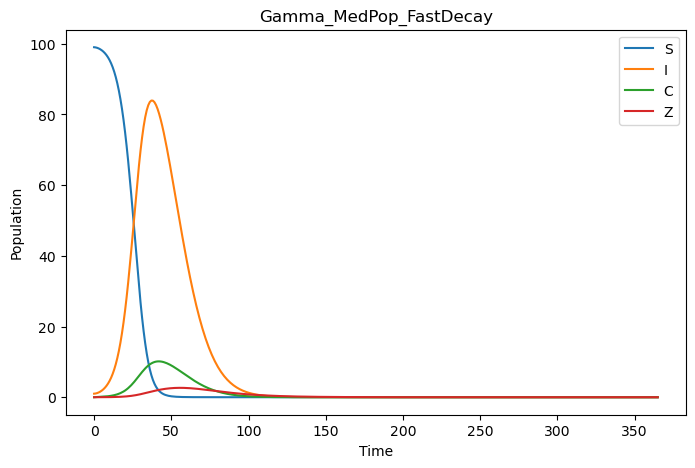

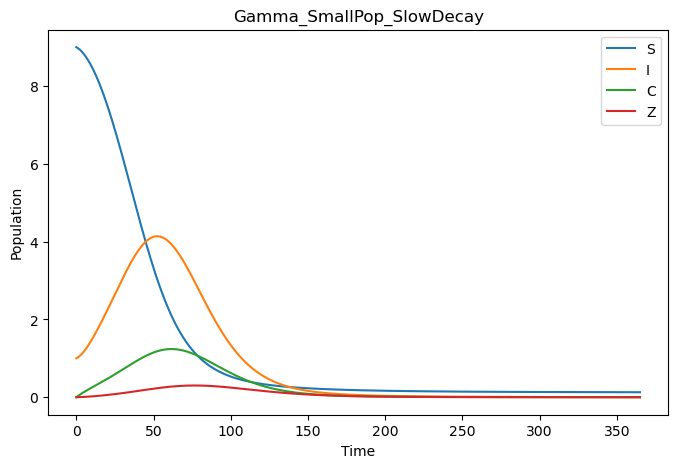

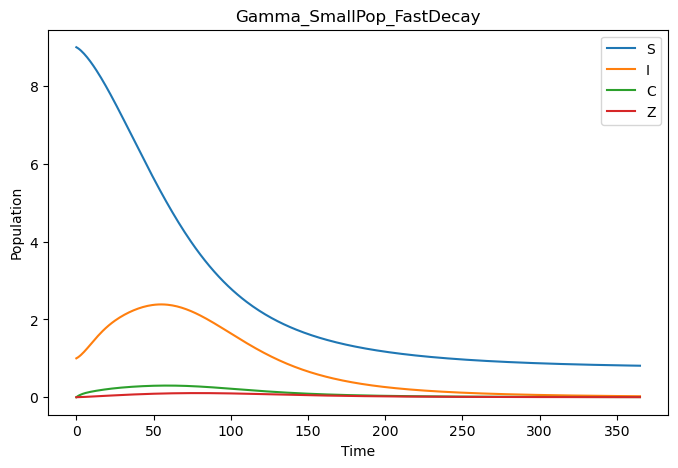

In [13]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns
from scipy.stats import gamma, expon
from matplotlib.gridspec import GridSpec

# Required libraries
import matplotlib.pyplot as plt

# For gamma/exponential fit

# For multi-panel plots

# SIR-like model with Carcass and Zoospore pool
def SICZ(x, t, params):
    # Extract state variables
    S, I, C, Z = x
    N = S + I + C

    # Extract parameters
    beta_p = params['beta_p']  # transmission
    beta_c = params['beta_c']  # transmission from carcass
    beta_z = params['beta_z']  # transmission from zoospore pool
    a = params['a']            # disease induced death rate
    lamdaC = params['lamdaC']  # decay of carcass
    sigma = params['sigma']    # shed rate from infected
    mu = params['mu']          # shed rate from carcass
    lamdaZ = params['lamdaZ']  # decay rate of zoospores
    # r = params.get('r', 0)   # recovery rate (not used)

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)
    return [dS, dI, dC, dZ]

# Initial conditions
intial_cond_Large = [999, 1, 0, 0]
intial_cond_Med = [99, 1, 0, 0]
intial_cond_Small = [9, 1, 0, 0]

times = np.linspace(0, 365, 365)
params = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001,
    "lamdaC": 1/4, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": 1/26.5
}

# Solve ODEs
resultsSICZLarge = odeint(SICZ, intial_cond_Large, times, args=(params,))
resultsSICZMed = odeint(SICZ, intial_cond_Med, times, args=(params,))
resultsSICZSmall = odeint(SICZ, intial_cond_Small, times, args=(params,))

# Convert to DataFrame
df_large = pd.DataFrame(resultsSICZLarge, columns=['S', 'I', 'C', 'Z'])
df_large['time'] = times
df_med = pd.DataFrame(resultsSICZMed, columns=['S', 'I', 'C', 'Z'])
df_med['time'] = times
df_small = pd.DataFrame(resultsSICZSmall, columns=['S', 'I', 'C', 'Z'])
df_small['time'] = times

# Plotting function
def plot_SICZ(df, title):
    plt.figure(figsize=(8,5))
    plt.plot(df['time'], df['S'], label='S')
    plt.plot(df['time'], df['I'], label='I')
    plt.plot(df['time'], df['C'], label='C')
    plt.plot(df['time'], df['Z'], label='Z')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

plot_SICZ(df_large, "Large Population")
plot_SICZ(df_med, "Medium Population")
plot_SICZ(df_small, "Small Population")

# Fit gamma and exponential to Carcass Survival data
# Carcass_Survival = pd.read_csv('Carcass_Survival.csv') # Example
# fit_gamma = gamma.fit(Carcass_Survival['Days.Survival'])
# fit_exp = expon.fit(Carcass_Survival['Days.Survival'])
# print("Gamma params:", fit_gamma)
# print("Exponential params:", fit_exp)
# # Compare AIC (not directly available, but can be calculated if needed)

# Gamma-distributed infection class model
def SICZ_gamma(x, t, params):
    # Extract state variables
    S, I1, I2, I3, I4, I5, C, Z = x
    I = I1 + I2 + I3 + I4 + I5
    N = S + I + C

    # Extract parameters
    beta_p = params['beta_p']
    beta_c = params['beta_c']
    beta_z = params['beta_z']
    a = params['a']
    lamdaC = params['lamdaC']
    sigma = params['sigma']
    mu = params['mu']
    lamdaZ = params['lamdaZ']

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI1 = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (5 * I1 * a)
    dI2 = (5 * I1 * a) - (5 * I2 * a)
    dI3 = (5 * I2 * a) - (5 * I3 * a)
    dI4 = (5 * I3 * a) - (5 * I4 * a)
    dI5 = (5 * I4 * a) - (5 * I5 * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)
    return [dS, dI1, dI2, dI3, dI4, dI5, dC, dZ]

# Initial conditions for gamma model
intial_cond_Large_gamma = [999, 1, 0, 0, 0, 0, 0, 0]
intial_cond_Med_gamma = [99, 1, 0, 0, 0, 0, 0, 0]
intial_cond_Small_gamma = [9, 1, 0, 0, 0, 0, 0, 0]

newparams = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001,
    "lamdaC": 1/10, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": 0.17/5.4
}
params_gamma = {
    "beta_p": 0.023, "beta_c": 0.023, "beta_z": 0.0001,
    "lamdaC": 1/4, "lamdaZ": 1/21.6, "sigma": 0.001,
    "mu": 0.01, "a": 0.17/5.4
}

# Solve ODEs for gamma model
resultsSICZGammaLarge_SlowDecay = odeint(SICZ_gamma, intial_cond_Large_gamma, times, args=(newparams,))
resultsSICZGammaMed_SlowDecay = odeint(SICZ_gamma, intial_cond_Med_gamma, times, args=(newparams,))
resultsSICZGammaSmall_SlowDecay = odeint(SICZ_gamma, intial_cond_Small_gamma, times, args=(newparams,))
resultsSICZGammaLarge_FastDecay = odeint(SICZ_gamma, intial_cond_Large_gamma, times, args=(params_gamma,))
resultsSICZGammaMed_FastDecay = odeint(SICZ_gamma, intial_cond_Med_gamma, times, args=(params_gamma,))
resultsSICZGammaSmall_FastDecay = odeint(SICZ_gamma, intial_cond_Small_gamma, times, args=(params_gamma,))

# Convert to DataFrame and sum I classes
def gamma_df(results, times):
    df = pd.DataFrame(results, columns=['S','I1','I2','I3','I4','I5','C','Z'])
    df['I'] = df[['I1','I2','I3','I4','I5']].sum(axis=1)
    df['time'] = times
    return df

df_gamma_large_slow = gamma_df(resultsSICZGammaLarge_SlowDecay, times)
df_gamma_large_fast = gamma_df(resultsSICZGammaLarge_FastDecay, times)
df_gamma_med_slow = gamma_df(resultsSICZGammaMed_SlowDecay, times)
df_gamma_med_fast = gamma_df(resultsSICZGammaMed_FastDecay, times)
df_gamma_small_slow = gamma_df(resultsSICZGammaSmall_SlowDecay, times)
df_gamma_small_fast = gamma_df(resultsSICZGammaSmall_FastDecay, times)

# Plotting function for gamma model
def plot_SICZ_gamma(df, title):
    plt.figure(figsize=(8,5))
    plt.plot(df['time'], df['S'], label='S')
    plt.plot(df['time'], df['I'], label='I')
    plt.plot(df['time'], df['C'], label='C')
    plt.plot(df['time'], df['Z'], label='Z')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

plot_SICZ_gamma(df_gamma_large_slow, "Gamma_LargePopSlowDecay")
plot_SICZ_gamma(df_gamma_large_fast, "Gamma_LargePop_FastDecay")
plot_SICZ_gamma(df_gamma_med_slow, "Gamma_MedPop_SlowDecay")
plot_SICZ_gamma(df_gamma_med_fast, "Gamma_MedPop_FastDecay")
plot_SICZ_gamma(df_gamma_small_slow, "Gamma_SmallPop_SlowDecay")
plot_SICZ_gamma(df_gamma_small_fast, "Gamma_SmallPop_FastDecay")

# The rest of the code (with Exposed, Recovered, Density Dependent, etc.) follows the same pattern:
# 1. Define the ODE function with the appropriate compartments and parameters.
# 2. Set initial conditions and parameters.
# 3. Solve with odeint.
# 4. Convert to DataFrame, sum I classes if needed.
# 5. Plot using matplotlib.

# If you need the rest of the code (with Exposed, Recovered, Density Dependent, etc.) translated as well, let me know!


Reflection on In-Class Example 4:

Steps taken:

1. Download the Carcass R file from canvas

2. Moved the file to my BIO_350_F25 folder

3. Created a new Jupyter Notebook named IC_InclassExample4.ipynb

4. Imported numpy, scipy.integrate.odeint, and matplotlib.pyplot in one code box

5. Then in another code box I copied the code from the Carcass R file and converted it to python by highlighting the code and using copilot to convert it to python

6. Went to the terminal and had to activate the IC_assignments using conda activate IC_assignments

7. Then in the terminal I installed scipy and seaborn using pip install scipy and pip install seaborn



Experience:

It went really well for me. I had no problems and the copilot translate the entire code correctly the first time. The error I had was because I didn't install certain packages that was needed and when I did install it it worked perfectly.